# Part 1

#### Importing libraries required for the project

In [1]:
!conda install -c anaconda beautifulsoup4 --yes
import bs4 as bs
import urllib.request
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - beautifulsoup4


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/w

##### calling the scrapper, reading the table and transforming the table into dataframe

In [2]:

source = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').read()
soup = bs.BeautifulSoup(source,'lxml')

#  find element table with class wikitable
table = soup.find('table', attrs={'class':'wikitable'})

# get the first table in the page
table = soup.find_all('table')

#dataframes have html parser for tables
df = pd.read_html(str(table))[0]



df.head()


,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


#### removing the not assigned boroughs, select the indexes of the rows that match the criteria and dropped them and reset the index

In [3]:

indexNames = df[df['Borough'] == 'Not assigned'].index
 
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [4]:
 df[df['Neighborhood'] == ''].head()

,Postal code,Borough,Neighborhood


#### Replacing value of neighborhood with Borough when it's empty (though there isn't any)

In [5]:
df['Neighborhood'].apply(lambda i: i if len(i)>0 else df['Borough'])

df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### Grouping together neighborhoods with the same postalcode and putting commas (there are no duplicate postal codes)


In [6]:
df['Neighborhood'] = df.groupby('Postal code')['Neighborhood'].transform(lambda x: ','.join(x))
df.head()


,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### printing shape

In [7]:
print(df.shape)

(103, 3)


# Part 2

#### Importing coordinates into separate dataframe of postal codes

In [8]:

df_postal = pd.read_csv('https://cocl.us/Geospatial_data')
df_postal.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merging previous dataframe with postalcodes dataframe with postalcode as the key

In [9]:
df3 = pd.merge(
    df,
    df_postal,
    left_on=['Postal code'],
    right_on=['Postal Code'],
    suffixes=('_left','_right')    
)

df3.head()


,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494


# Part 3

In [10]:
np.random.seed(0)

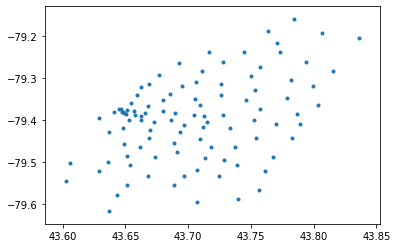

In [11]:
plt.scatter(df3['Latitude'], df3['Longitude'], marker='.')

#### Scale the input values in order to get better results

In [17]:
from sklearn.preprocessing import StandardScaler
X = df3.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.93187104,  0.69818881],
       [ 0.40749844,  0.84388426],
       [-0.96437519,  0.37773518],
       [ 0.26644077, -0.6993678 ],
       [-0.81034434,  0.07922652],
       [-0.7039597 , -1.39737754],
       [ 1.95523876,  2.09777597],
       [ 0.79103364,  0.465121  ],
       [ 0.03427589,  0.90216906],
       [-0.90879146,  0.18842596],
       [ 0.09518258, -0.49568547],
       [-1.0279041 , -1.62993333],
       [ 1.53094905,  2.44798852],
       [ 0.40783172,  0.58164715],
       [-0.17744183,  0.81474393],
       [-1.01735586,  0.22482887],
       [-0.20737226, -0.32106485],
       [-1.1701819 , -1.86243118],
       [ 1.12942801,  2.15613628],
       [-0.54111407,  1.07704414],
       [-1.14613182,  0.24667041],
       [-0.29846415, -0.58298336],
       [ 1.271543  ,  1.86437197],
       [ 0.0852875 ,  0.3486083 ],
       [-0.89364811,  0.10106496],
       [-0.67165797, -0.26285143],
       [ 1.3126078 ,  1.6310228 ],
       [ 1.89922981,  0.3486083 ],
       [ 0.95236034,

#### model the data

In [29]:
from sklearn.cluster import KMeans 

clusterNum = 8
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[6 7 2 1 2 3 0 6 7 2 1 3 0 7 7 2 1 3 0 7 2 1 0 7 2 2 0 6 4 7 2 1 0 6 5 7 2
 2 0 4 1 7 2 2 7 4 5 7 2 1 5 0 4 5 7 4 1 5 7 4 5 4 4 1 5 6 4 4 2 1 5 6 4 4
 2 1 3 5 0 2 2 1 6 2 2 6 2 2 3 5 6 2 2 3 5 0 2 2 3 2 7 3 3]


In [31]:

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

df3["Labels"] = labels
df3.head(5)

[[ 43.77182265 -79.22086026]
 [ 43.68813134 -79.46312076]
 [ 43.66046495 -79.38970715]
 [ 43.63623247 -79.53902706]
 [ 43.74954714 -79.40696616]
 [ 43.72876881 -79.53606859]
 [ 43.7761489  -79.318697  ]
 [ 43.69316075 -79.32203196]]


,Postal code,Borough,Neighborhood,Postal Code,Latitude,Longitude,Labels
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656,6
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572,7
2,M5A,Downtown Toronto,Regent Park / Harbourfront,M5A,43.654260,-79.360636,2
3,M6A,North York,Lawrence Manor / Lawrence Heights,M6A,43.718518,-79.464763,1
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,M7A,43.662301,-79.389494,2


In [89]:
# define the world map centered around Canada with a low zoom level
canada_map = folium.Map(location=[43.651070, -79.347300], zoom_start=11)

points = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng in zip(df3.Latitude, df3.Longitude):
    points.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6))

    
for lat, lng, label in zip(df3.Latitude, df3.Longitude, str(df3.Labels)):
    folium.Marker([lat, lng], popup=label).add_to((canada_map))

canada_map.add_child(points)
canada_map